In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
engine.execute('Select * from Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
precips = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').all()
print(precips)

[('2017-08-23', 0.0), ('2017-08-23', 0.0), ('2017-08-23', 0.08), ('2017-08-23', 0.45), ('2017-08-22', 0.0), ('2017-08-22', 0.0), ('2017-08-22', 0.5), ('2017-08-21', 0.0), ('2017-08-21', 0.02), ('2017-08-21', None), ('2017-08-21', 0.56), ('2017-08-20', 0.0), ('2017-08-20', 0.01), ('2017-08-20', None), ('2017-08-19', 0.0), ('2017-08-19', 0.0), ('2017-08-19', None), ('2017-08-19', 0.09), ('2017-08-18', 0.0), ('2017-08-18', 0.0), ('2017-08-18', 0.06), ('2017-08-18', None), ('2017-08-17', 0.0), ('2017-08-17', 0.05), ('2017-08-17', 0.01), ('2017-08-17', 0.13), ('2017-08-16', 0.0), ('2017-08-16', 0.07), ('2017-08-16', 0.12), ('2017-08-16', 0.42), ('2017-08-15', 0.02), ('2017-08-15', 0.0), ('2017-08-15', 0.06), ('2017-08-15', 0.32), ('2017-08-15', 0.42), ('2017-08-14', 0.0), ('2017-08-14', 0.01), ('2017-08-14', 0.08), ('2017-08-14', 0.0), ('2017-08-14', 0.22), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-13', 0.0), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-12', 0.0), ('2017-

In [15]:
date = [precip[0] for precip in precips[:]]
precipitation = [precip[1] for precip in precips[:]]

In [16]:
df = pd.DataFrame(precips[:], columns = ['date', 'precipitation'])
df.set_index('date', inplace=True)
df

,precipitation
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


In [17]:
df.sort_index(inplace=True)

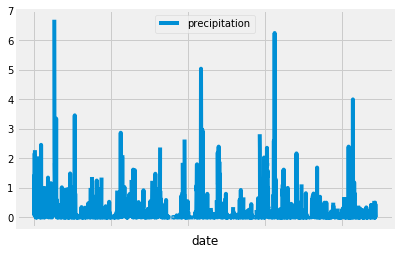

In [18]:
df.plot(y='precipitation', use_index=True, grid = True)
plt.legend(loc ='upper center')
plt.show()

In [19]:
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
station = session.query(Measurement.station).\
    group_by(Measurement.station).count()
print(station)

9


In [21]:
count = func.count(Measurement.station).label('count')
stations = session.query(count, Measurement.station).\
group_by(Measurement.station).all()
print(stations)

[(1979, 'USC00511918'), (2709, 'USC00513117'), (2202, 'USC00514830'), (2612, 'USC00516128'), (1372, 'USC00517948'), (511, 'USC00518838'), (2772, 'USC00519281'), (2724, 'USC00519397'), (2669, 'USC00519523')]


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stationcount = session.query(count, Measurement.station).\
group_by(Measurement.station).\
order_by(count.desc()).all()
print(stationcount)

[(2772, 'USC00519281'), (2724, 'USC00519397'), (2709, 'USC00513117'), (2669, 'USC00519523'), (2612, 'USC00516128'), (2202, 'USC00514830'), (1979, 'USC00511918'), (1372, 'USC00517948'), (511, 'USC00518838')]


In [23]:
highest = session.query(count, Measurement.station).\
group_by(Measurement.station).\
order_by(count.desc()).first()
print(highest)

(2772, 'USC00519281')


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
records = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').\
group_by(Measurement.station).all()
print(records)

[(54.0, 85.0, 71.66378066378067)]


In [25]:
temps = session.query(Measurement.date, Measurement.tobs).\
order_by(Measurement.date.desc()).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').all()
print(temps)

[('2017-08-18', 79.0), ('2017-08-17', 76.0), ('2017-08-16', 76.0), ('2017-08-15', 77.0), ('2017-08-14', 77.0), ('2017-08-13', 77.0), ('2017-08-06', 83.0), ('2017-08-05', 82.0), ('2017-08-04', 77.0), ('2017-07-31', 76.0), ('2017-07-30', 81.0), ('2017-07-29', 82.0), ('2017-07-28', 81.0), ('2017-07-27', 76.0), ('2017-07-26', 75.0), ('2017-07-25', 77.0), ('2017-07-24', 75.0), ('2017-07-23', 82.0), ('2017-07-22', 77.0), ('2017-07-21', 77.0), ('2017-07-20', 77.0), ('2017-07-19', 76.0), ('2017-07-18', 76.0), ('2017-07-17', 76.0), ('2017-07-16', 80.0), ('2017-07-15', 80.0), ('2017-07-14', 76.0), ('2017-07-13', 74.0), ('2017-07-12', 74.0), ('2017-07-11', 72.0), ('2017-07-10', 69.0), ('2017-07-09', 78.0), ('2017-07-08', 78.0), ('2017-07-07', 75.0), ('2017-07-06', 74.0), ('2017-07-05', 77.0), ('2017-07-04', 78.0), ('2017-07-03', 76.0), ('2017-07-02', 81.0), ('2017-07-01', 79.0), ('2017-06-30', 76.0), ('2017-06-29', 76.0), ('2017-06-28', 77.0), ('2017-06-27', 76.0), ('2017-06-26', 73.0), ('2017-06

In [26]:
date = [temp[0] for temp in temps[:]]
tobs = [temp[1] for temp in temps[:]]


In [27]:
df = pd.DataFrame(temps[:], columns = ['date', 'tobs'])
df

,date,tobs
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0
5,2017-08-13,77.0
6,2017-08-06,83.0
7,2017-08-05,82.0
8,2017-08-04,77.0
9,2017-07-31,76.0


<function matplotlib.pyplot.show(*args, **kw)>

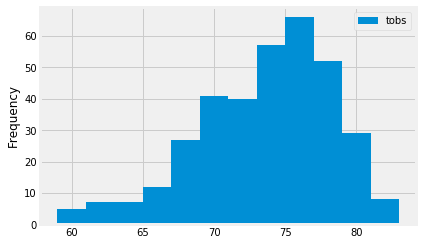

In [28]:
df.plot.hist(bins=12)
plt.show

## Optional Challenge Assignment

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-05-10', '2017-05-20'))

[(68.0, 74.91803278688525, 79.0)]


In [30]:
dfcalctemps = pd.DataFrame(calc_temps('2017-05-10', '2017-05-20'), columns = ['min', 'avg', 'max'])
dfcalctemps


,min,avg,max
0,68.0,74.918033,79.0


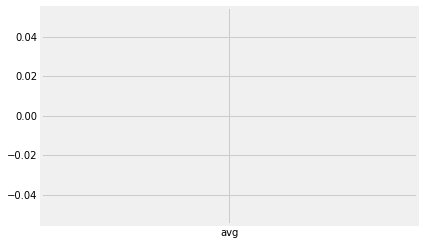

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar('avg', 0)
plt.show()

In [ ]:
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
